In [1]:
import pandas as pd
import seaborn as sns

import torchaudio

In [2]:
import os 
os.environ['TOKENIZERS_PARALLELISM'] = 'true'

In [3]:
from transformers import PreTrainedTokenizerFast

In [4]:
tokenizer_file = 'data/tokenizer/trained_tokenizer.json'

try: ##Check if tokenizer is defined
    tokenizer

except NameError as e: ## If tokenizer is not defined then initialize it
    tokenizer = PreTrainedTokenizerFast(tokenizer_file=tokenizer_file)

finally:
    special_tokens_dict = {'pad_token': '[PAD]',
                       'sep_token': '[SEP]',
                       'mask_token': '[MASK]'}
    
    tokenizer.add_special_tokens(special_tokens_dict)
    
    blank_token = "[PAD]"
    blank_token_id = tokenizer.vocab[blank_token]
    
    vocab_size = len(tokenizer)

In [5]:
df = pd.read_csv('./data/external/cv-corpus-8.0-2022-01-19/en/train.tsv', sep = '\t')

In [6]:
df = df.drop(['gender', 'locale', 'client_id'], axis = 1)

In [7]:
df = df.dropna(how = 'all', axis = 1)

/home/ashim/miniconda3/envs/speech/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='up_votes', ylabel='Density'>

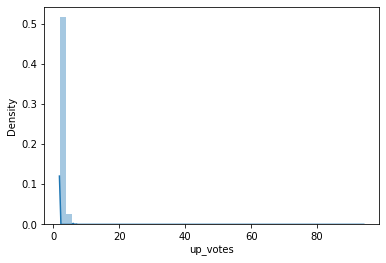

In [8]:
sns.distplot(df['up_votes'])

In [9]:
df[(df['up_votes'] - df['down_votes']) < 2]

,path,sentence,up_votes,down_votes,age,accents
3,common_voice_en_28449986.mp3,Eleva and Strum each house an elementary school.,2,1,NaN,NaN
15,common_voice_en_20783579.mp3,Trivers' theory is very powerful.,2,1,NaN,NaN
19,common_voice_en_23612307.mp3,"The movie ""Owning Mahowny"" was based on Ross's...",2,1,twenties,NaN
21,common_voice_en_26972322.mp3,The invaders who reached the shore were repuls...,2,1,NaN,NaN
22,common_voice_en_26972323.mp3,Tracer ammunition was identified by painting t...,2,1,NaN,NaN
...,...,...,...,...,...,...
827084,common_voice_en_22130324.mp3,The inhabitants apparently all benefited from ...,2,1,thirties,United States English
827088,common_voice_en_22130402.mp3,The quickstep is elegant like the foxtrot and ...,2,1,thirties,United States English
827089,common_voice_en_22130406.mp3,This cartridge was originally designed as a bl...,2,1,thirties,United States English
827092,common_voice_en_22130493.mp3,I'm obviously not going to be revelling in the...,2,1,thirties,United States English


In [10]:
df.describe()

,up_votes,down_votes
count,864448.000000,864448.000000
mean,2.140156,0.173734
std,0.519669,0.408876
min,2.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,2.000000,0.000000
max,94.000000,6.000000


In [11]:
df['words'] = df['sentence'].map(lambda x: len(x.split(' ')))

<AxesSubplot:ylabel='Frequency'>

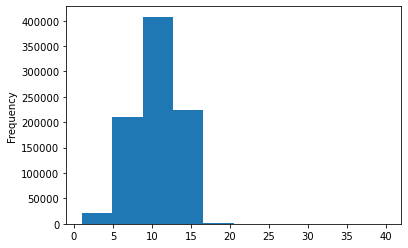

In [12]:
df['words'].plot(kind = 'hist')

In [13]:
df['characters'] = df['sentence'].map(lambda x: len(x))

<AxesSubplot:ylabel='Frequency'>

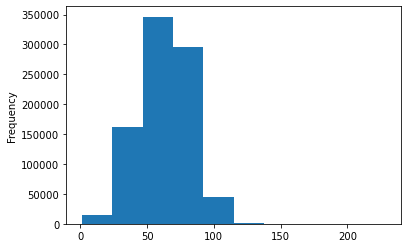

In [14]:
df['characters'].plot(kind = 'hist')

In [15]:
df.describe()

,up_votes,down_votes,words,characters
count,864448.000000,864448.000000,864448.000000,864448.000000
mean,2.140156,0.173734,10.296428,63.076503
std,0.519669,0.408876,2.779394,18.966438
min,2.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,8.000000,50.000000
50%,2.000000,0.000000,11.000000,64.000000
75%,2.000000,0.000000,13.000000,77.000000
max,94.000000,6.000000,40.000000,229.000000


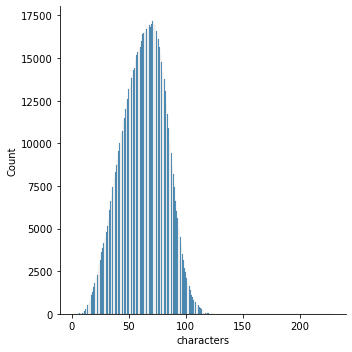

In [16]:
sns.displot(df['characters'])

In [17]:
df[df['characters'] > 100]

,path,sentence,up_votes,down_votes,age,accents,words,characters
7,common_voice_en_20293213.mp3,"It rapidly became a bible for gardeners, self-...",2,0,NaN,NaN,13,101
77,common_voice_en_23687188.mp3,"With improved transportation routes, such as Y...",2,1,NaN,NaN,14,109
98,common_voice_en_20009604.mp3,"By freeing religion of supernaturalism, it wil...",2,0,fifties,Australian English,14,103
100,common_voice_en_19655186.mp3,"A software distributor, for example, may seek ...",2,0,NaN,NaN,14,107
201,common_voice_en_20147452.mp3,"Unfortunately, with several different ways of ...",2,0,NaN,NaN,13,102
...,...,...,...,...,...,...,...,...
864028,common_voice_en_28674231.mp3,"The post-WrestleMania ""Raw"" has typically feat...",4,0,fifties,"German English,Non native speaker",14,114
864248,common_voice_en_28732180.mp3,The academy provides a serious program for pre...,4,0,fifties,"German English,Non native speaker",14,102
864250,common_voice_en_28732182.mp3,"After operations have ceased, military organis...",4,0,fifties,"German English,Non native speaker",13,101
864317,common_voice_en_28752779.mp3,Although Wortham was Browning's nephew and fir...,4,0,fifties,"German English,Non native speaker",14,101


In [18]:
sentence_list = df['sentence'].values.tolist()

In [19]:
tokenized_dict = tokenizer(sentence_list, return_attention_mask=False, return_token_type_ids=False, return_special_tokens_mask=False, return_length=True)

In [20]:
df['token_ids'] = tokenized_dict['input_ids']
df['token_lengths'] = tokenized_dict['length']

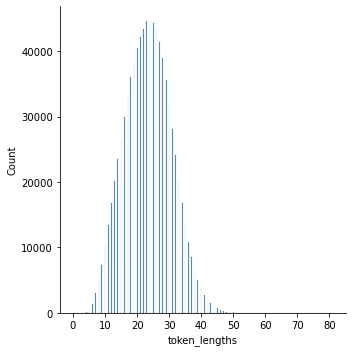

In [21]:
sns.displot(df['token_lengths'])

In [22]:
df.describe()

,up_votes,down_votes,words,characters,token_lengths
count,864448.000000,864448.000000,864448.000000,864448.000000,864448.000000
mean,2.140156,0.173734,10.296428,63.076503,23.457702
std,0.519669,0.408876,2.779394,18.966438,7.306562
min,2.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,8.000000,50.000000,18.000000
50%,2.000000,0.000000,11.000000,64.000000,23.000000
75%,2.000000,0.000000,13.000000,77.000000,28.000000
max,94.000000,6.000000,40.000000,229.000000,81.000000


In [23]:
datasetPATH = 'data/external/cv-corpus-8.0-2022-01-19/en/'
clipsPATH = os.path.join(datasetPATH, 'clips')

In [24]:
from utils.preprocess import Preprocessing

In [25]:
preprocessing = Preprocessing(out_channels= 1, out_sampling_rate = 16000, tokenizer = tokenizer)

In [36]:
def extract_time_length(item):

    audio_file_path = os.path.join(clipsPATH, item['path'])

    waveform, source_sampling_rate = torchaudio.load(audio_file_path)
    waveform, out_sampling_rate = preprocessing.preprocess_waveform(waveform, source_sampling_rate)

    melspec = preprocessing.extract_features(waveform)
    
    length = melspec.shape[1]
    
    return length

In [ ]:
df['time'] = df.apply(extract_time_length, axis = 1)